In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import ipywidgets as widgets

In [52]:
cc_data = pd.read_csv("MC2/cc_data.csv", encoding="latin1")
print("Credit card data loaded successfully.")

loyalty_data = pd.read_csv("MC2/loyalty_data.csv", encoding="latin1")
print("Loyalty card data loaded successfully.")

Credit card data loaded successfully.
Loyalty card data loaded successfully.


In [53]:


# Funktion för att filtrera datan efter datum
def filter_data_by_date_range(data, start_date, end_date):
    return data[(data["timestamp"] >= start_date) & (data["timestamp"] <= end_date)]

# Ange den önskade tidsperioden
start_date_default = "01/06/2014"
end_date_default = "01/19/2014"

# Skapa en slider för att välja startdatum och slutdatum
start_date_slider = widgets.DatePicker(description='Start Date', value=pd.to_datetime(start_date_default))
end_date_slider = widgets.DatePicker(description='End Date', value=pd.to_datetime(end_date_default))

# Funktion för att uppdatera histogrammet baserat på slider-värden
def update_histogram(start_date, end_date):
    # Filtrera datan efter den valda tidsperioden
    cc_data_filtered = filter_data_by_date_range(cc_data, start_date.strftime('%m/%d/%Y'), end_date.strftime('%m/%d/%Y'))
    loyalty_data_filtered = filter_data_by_date_range(loyalty_data, start_date.strftime('%m/%d/%Y'), end_date.strftime('%m/%d/%Y'))

    # Räkna antalet transaktioner vid varje plats för båda dataseten
    cc_location_counts = cc_data_filtered["location"].value_counts()
    loyalty_location_counts = loyalty_data_filtered["location"].value_counts()

    # Skapa stapeldiagrammet
    plt.figure(figsize=(12, 8))
    all_locations = cc_location_counts.index.union(loyalty_location_counts.index)
    cc_location_counts = cc_location_counts.reindex(all_locations, fill_value=0)
    loyalty_location_counts = loyalty_location_counts.reindex(all_locations, fill_value=0)

    bar_width = 0.35
    index = range(len(all_locations))
    plt.bar(index, cc_location_counts, bar_width, label="Credit Card Transactions", color="b", alpha=0.6)
    plt.bar([p + bar_width for p in index], loyalty_location_counts, bar_width, label="Loyalty Card Transactions", color="r", alpha=0.6)
    
    plt.xlabel("Locations")
    plt.ylabel("Number of Transactions")
    plt.title("Number of Transactions Overview")
    plt.xticks([p + bar_width / 2 for p in index], all_locations, rotation=45, ha="right")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Uppdatera histogrammet när slider-värdena ändras
widgets.interactive(update_histogram, start_date=start_date_slider, end_date=end_date_slider)


interactive(children=(DatePicker(value=Timestamp('2014-01-06 00:00:00'), description='Start Date', step=1), Da…

c:\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


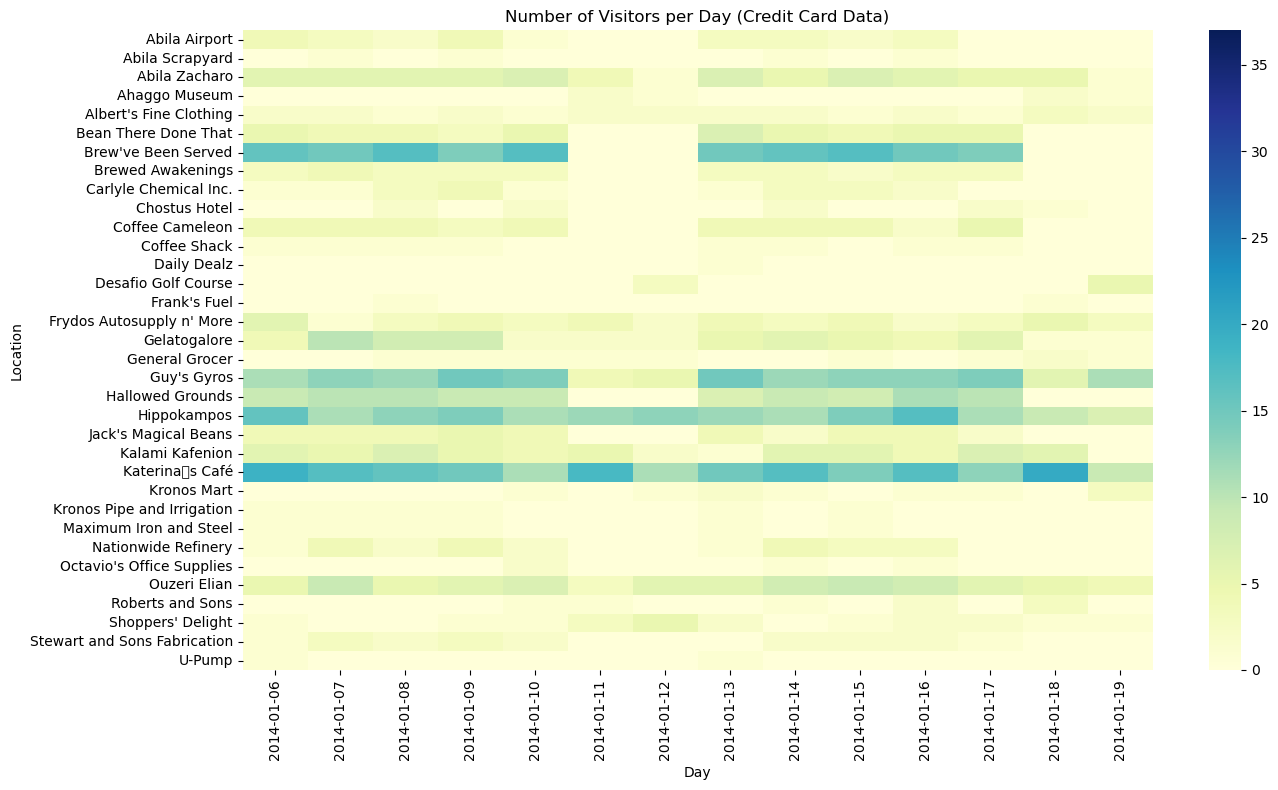

c:\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


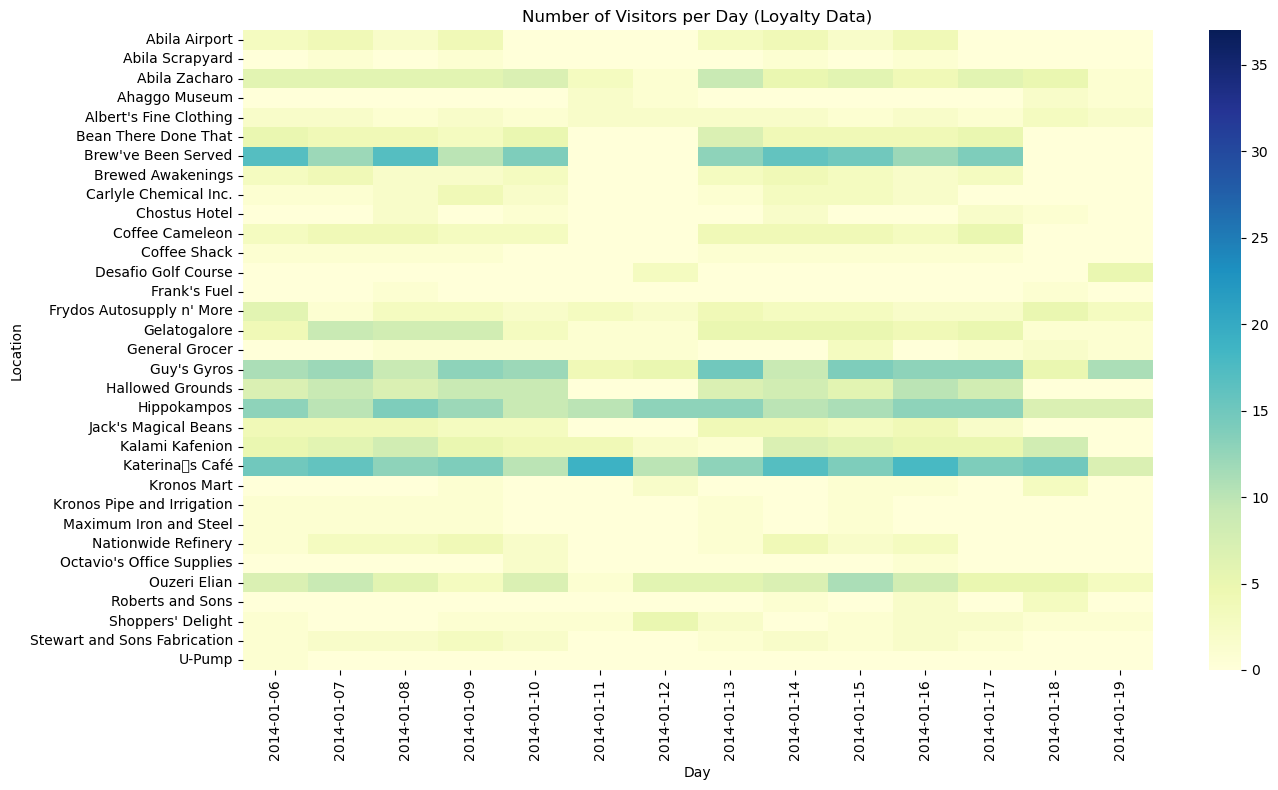

c:\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.draw()
c:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


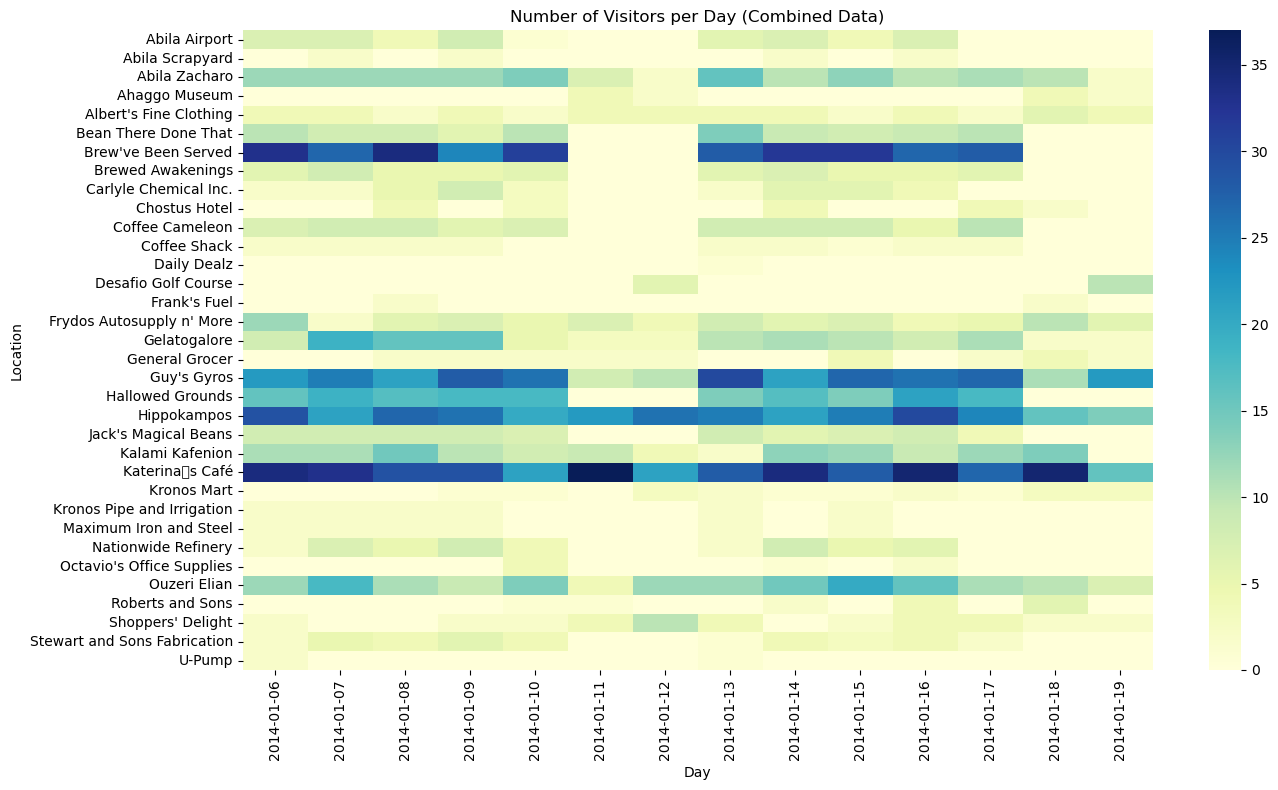

In [54]:


# Funktion för att beräkna antalet besökare för varje plats och dag
def calculate_visitors_per_day(data):
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['day'] = data['timestamp'].dt.date
    visitors_per_day = data.groupby(['location', 'day']).size().unstack(fill_value=0)
    return visitors_per_day

cc_visitors_per_day = calculate_visitors_per_day(cc_data)
loyalty_visitors_per_day = calculate_visitors_per_day(loyalty_data)
total_visitors_per_day = cc_visitors_per_day.add(loyalty_visitors_per_day, fill_value=0)

vmin = total_visitors_per_day.min().min()
vmax = total_visitors_per_day.max().max()

# Plotta heatmap för cc_data
plt.figure(figsize=(14, 8))
plt.title('Number of Visitors per Day (Credit Card Data)')
sns.heatmap(cc_visitors_per_day, cmap='YlGnBu', vmin=vmin, vmax=vmax)
plt.xlabel('Day')
plt.ylabel('Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotta heatmap för loyalty_data
plt.figure(figsize=(14, 8))
plt.title('Number of Visitors per Day (Loyalty Data)')
sns.heatmap(loyalty_visitors_per_day, cmap='YlGnBu', vmin=vmin, vmax=vmax)
plt.xlabel('Day')
plt.ylabel('Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
plt.title('Number of Visitors per Day (Combined Data)')
sns.heatmap(total_visitors_per_day, cmap='YlGnBu', vmin=vmin, vmax=vmax)
plt.xlabel('Day')
plt.ylabel('Location')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [63]:
from ipywidgets import interact
import ipywidgets as widgets

# Function for calculating visitors per day for each location
def calculate_visitors_per_day(data):
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['day'] = data['timestamp'].dt.date
    visitors_per_day = data.groupby(['location', 'day']).size().unstack(fill_value=0)
    return visitors_per_day

# Calculate visitors per day for each dataset
cc_visitors_per_day = calculate_visitors_per_day(cc_data)
loyalty_visitors_per_day = calculate_visitors_per_day(loyalty_data)
total_visitors_per_day = cc_visitors_per_day.add(loyalty_visitors_per_day, fill_value=0)

# Get min and max values for color scaling
vmin = total_visitors_per_day.min().min()
vmax = total_visitors_per_day.max().max()

# Store data and titles in a dictionary
data_dict = {
    'Credit Card Data': (cc_visitors_per_day, 'Number of Visitors per Day (Credit Card Data)'),
    'Loyalty Data': (loyalty_visitors_per_day, 'Number of Visitors per Day (Loyalty Data)'),
    'Combined Data': (total_visitors_per_day, 'Number of Visitors per Day (Combined Data)')
}

# Function to plot heatmap for given data
def plot_heatmap(data, title):
    plt.figure(figsize=(9, 8))  # Adjusted size
    plt.title(title)
    sns.heatmap(data, cmap='YlGnBu', vmin=vmin, vmax=vmax)
    plt.xlabel('Day')
    plt.ylabel('Location')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Interactive plotting
@interact(data_type=data_dict.keys())
def plot_heatmap_interactive(data_type):
    plot_heatmap(*data_dict[data_type])


interactive(children=(Dropdown(description='data_type', options=('Credit Card Data', 'Loyalty Data', 'Combined…